LOCO, AT version
Execution time loading lattice: 0.00099945068359375 sec


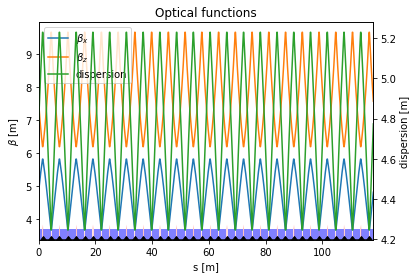

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [1]:
print(f"LOCO, AT version")
from at import *
from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
from Lattice import *
#from at_modules_loco import *
from at_modules_loco import *

t0_fullCode =  time.time()
t0 = time.time()
ring=at.Lattice(ring3, energy=1)

t1 = time.time()
print(f"Execution time loading lattice: {t1-t0} sec")

#ring = at.load_mat('fccee_t_v22_b_c.mat', key='ring')
ring.radiation_off()
ring.plot_beta()

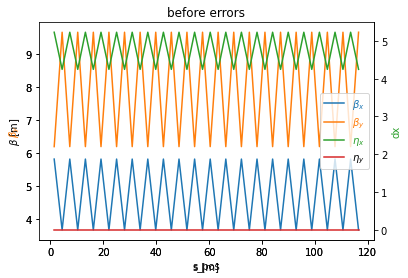

getOptics: 0.40783214569091797 sec


In [2]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [3]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=ring[i].H*0
#Save quads strengths
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before = np.array([ring[ind].K for ind in quad_indexes])
t0 = time.time()
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = [ring[ind].FamName for ind in correctors_indexes]
used_correctors = used_cor(1, correctors_names)
print("Number of used Correctors: ", len(used_correctors))
t1 = time.time()
print(f"Execution time choose correctors: {t1-t0} sec")

Choose Used correctors
Total number of Correctors:  40
Number of used Correctors:  40
Execution time choose correctors: 0.0029921531677246094 sec


In [4]:
print("Choose Used Quadrpoles Families")

t0 = time.time()

steps = 1 #use all quads individually
used_quadrpoles_families, used_quadrpoles_families_ind = used_quadrpoles(ring, steps)
used_qs_families, used_qs_families_ind = used_skew(ring, steps)

qf_qd_ind =  used_quadrpoles_families_ind
used_quadrpoles_families = used_quadrpoles_families+used_qs_families
used_quadrpoles_families_ind = used_quadrpoles_families_ind+used_qs_families_ind


t1 = time.time()
print(f"Execution time chose quadrpoles: {t1-t0} sec")

Choose Used Quadrpoles Families
# of QF: 20 # of QD: 20
used_quadrpoles_families_ind:  40
# of QS: 20
used_qs_families_ind:  20
Execution time chose quadrpoles: 0.013922929763793945 sec


In [5]:
# BPM_to_corrector_response_matrices (Model)

BPMs_random_noise = 0.0
t0 = time.time()
Cxx, Cxy= ORM_x(1.e-4, ring, BPMs_random_noise,used_correctors)
Cyy, Cyx= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time ORMs: {t1-t0} sec")
print("orm dimensions: ", shape(Cxx))
print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

Execution time ORMs: 1.1289935111999512 sec
orm dimensions:  (40, 40)
0.0
0.0
5778.075710425026
112.00324008777743


In [6]:
eta_xx, eta_yy= eta(ring)
print(shape(eta_xx))
print(eta_yy)

(301,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
dk =0.0001

t0 = time.time()

eta_0x, eta_0y, d_eta_x, d_eta_y  = generatingQuadsResponseEta(ring,dk,eta_xx, eta_yy, used_quadrpoles_families_ind)

t1 = time.time()
print(f"Execution time: {t1-t0} sec")

generating response to family  1
Execution time: 0.11469197273254395 sec
generating response to family  2
Execution time: 0.09777188301086426 sec
generating response to family  3
Execution time: 0.09874105453491211 sec
generating response to family  4
Execution time: 0.08972334861755371 sec
generating response to family  5
Execution time: 0.10072946548461914 sec
generating response to family  6
Execution time: 0.0937495231628418 sec
generating response to family  7
Execution time: 0.09773850440979004 sec
generating response to family  8
Execution time: 0.11968016624450684 sec
generating response to family  9
Execution time: 0.08876323699951172 sec
generating response to family  10
Execution time: 0.09049606323242188 sec
generating response to family  11
Execution time: 0.08676934242248535 sec
generating response to family  12
Execution time: 0.0917806625366211 sec
generating response to family  13
Execution time: 0.08574509620666504 sec
generating response to family  14
Execution time:

In [8]:
coupling_parameters(ring,'*')

(0.0, 0.0)

In [9]:
gradErr = 0.05
for i in used_qs_families_ind:

    ring[i[0]].K = (gradErr * np.random.randn())

Execution time simulte erros: 0.0019106864929199219 sec


Text(0, 0.5, '$\\Delta K[m^-2]$')

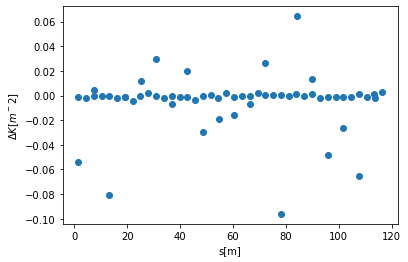

In [10]:
t0 = time.time()
gradErr = 1.e-3
tilt = 1.e-3
simulateFixedGradientErrors(ring, gradErr, qf_qd_ind)
simulateAlignmentErrors(ring, tilt, qf_qd_ind)
t1 = time.time()
print(f"Execution time simulte erros: {t1-t0} sec")

#quads strengths after errors
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_after = np.array([ring[ind].K for ind in quad_indexes])
twissq = getOptics(ring, elements.Quadrupole, BPMs_random_noise)
plt.scatter(twissq.s_pos, np.array(quad_strengths_before)- np.array(quad_strengths_after))
plt.xlabel("s[m]")
plt.ylabel("$\Delta K[m^-2]$")

In [11]:
coupling_parameters(ring, '*')

(0.12255980576925758, 0.23393670004383574)

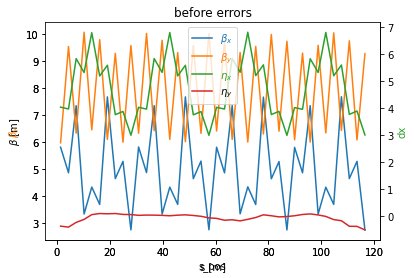

getOptics: 0.4966421127319336 sec


In [12]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss_err = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss_err, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [13]:
# DRM (dispersion responce matrix)

eta_xx_err1, eta_yy_err1 = eta(ring)

print(shape(eta_yy_err1))
print(eta_yy_err1)

(301,)
[-0.44608752 -0.38113705 -0.38113705 -0.37614086 -0.37614086 -0.37325266
 -0.37355718 -0.37495128 -0.39307464 -0.41119799 -0.41119799 -0.41259209
 -0.41259209 -0.41020685 -0.40404919 -0.32399973 -0.24395026 -0.24395026
 -0.23779261 -0.23779261 -0.23299779 -0.22943003 -0.22573526 -0.17770324
 -0.12967123 -0.12967123 -0.12597645 -0.12597645 -0.12106525 -0.11495224
 -0.03548315  0.04398594  0.04398594  0.05009894  0.05009894  0.05642411
  0.06024617  0.06134666  0.0756531   0.08995953  0.08995953  0.09106003
  0.09106003  0.09143276  0.09107648  0.08644486  0.08181324  0.08181324
  0.08145696  0.08145696  0.08148725  0.08186333  0.08219861  0.08655727
  0.09091592  0.09091592  0.09125121  0.09125121  0.09083456  0.08966705
  0.07448943  0.05931181  0.05931181  0.0581443   0.0581443   0.05725208
  0.05686469  0.05670774  0.05466748  0.05262722  0.05262722  0.05247027
  0.05247027  0.05189557  0.05090485  0.03802554  0.02514623  0.02514623
  0.02415551  0.02415551  0.02325151  0.0230

In [14]:
numberOfIteration = 5
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
    eta_xx_err, eta_yy_err= eta(ring)
    A, B = defineMatrices_eta(eta_0x, eta_0y, eta_xx_err, eta_yy_err, d_eta_x, d_eta_y)
    dk = len(d_eta_x)
    cut = 60
    r= getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_quadrpoles_families_ind)
    twiss_corrected = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
    eta_xx_corr, eta_yy_corr= eta( ring)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    print('dispersion with errors')
    etax_err, etay_err = getEta(eta_xx, eta_yy, eta_xx_err, eta_yy_err, ring)
    print('dispersion after correction')
    etax_cor, etay_cor = getEta(eta_xx, eta_yy, eta_xx_corr, eta_yy_corr, ring)
    print('x_dispersion_correction reduction', (1-etax_cor/etax_err)*100)
    print('y_dispersion_correction reduction', (1-etay_cor/etay_err)*100)

iteration0:
NK: 60
Nm: 60
beta beating with errors
RMS beta beat, x:22.130924247648736%   y: 2.7881303251524687%
STD beta beat, x:21.653138281315922%   y: 2.785324087449973%
beta beating after corrections
RMS beta beat, x:4.820927237621046%   y: 0.5037753487865922%
STD beta beat, x:4.815404572587987%   y: 0.5037681870696964%
betax_correction reduction 78.2163312129486
betax_correction reduction 81.93142751463589
dispersion with errors
get Eeta dx and dy: 
RMS Dispersion, x:21.205705840598174%   y: 16.96990506652288%
STD Dispersion, x:21.205392536554843%   y: 15.46539721832684%
dispersion after correction
get Eeta dx and dy: 
RMS Dispersion, x:7.993225306199663%   y: 5.85257709367336%
STD Dispersion, x:7.993143709138007%   y: 5.765586931570224%
x_dispersion_correction reduction 62.30625207062578
y_dispersion_correction reduction 65.51202219027765
iteration1:
NK: 60
Nm: 60
beta beating with errors
RMS beta beat, x:4.820927237621046%   y: 0.5037753487865922%
STD beta beat, x:4.81540457258

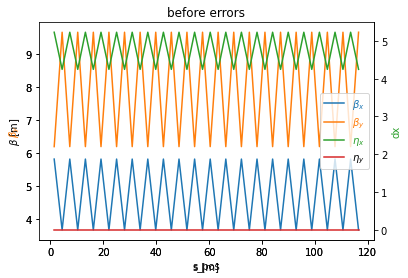

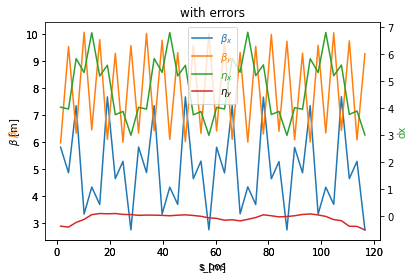

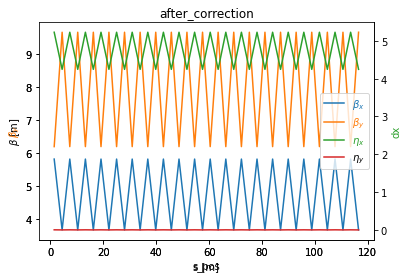

In [15]:
make_plot_all2(twiss, 'before errors')
make_plot_all2(twiss_err, 'with errors')
make_plot_all2(twiss_corrected, 'after_correction')

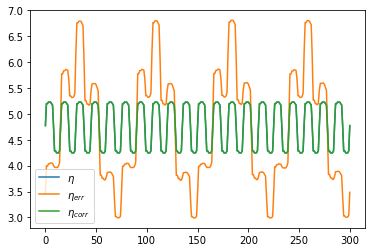

In [16]:
compare_drm(eta_xx, eta_xx_err1, eta_xx_corr)

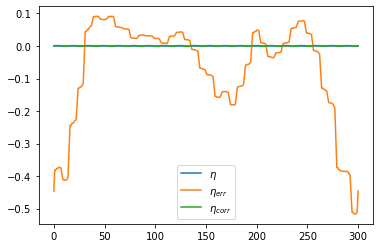

In [17]:
compare_drm(eta_yy, eta_yy_err1, eta_yy_corr)

In [18]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 11.978180885314941 sec
